## Concrete compressive strength prediction

### Importing libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

### Importing the data

In [66]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Inspecting the data

In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [68]:
# Verifying is there is any missing value

In [69]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Getting the predictors and the targets

In [70]:
df_columns = df.columns

In [71]:
predictors = df[df_columns[df_columns!='Strength']]
target = df['Strength']

In [72]:
print(predictors.shape,target.shape)

(1030, 8) (1030,)


## Splitting the data

In [73]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.2)
print('The training data shape:',x_train.shape,y_train.shape)
print('The test data shape:',x_test.shape,y_test.shape)

The training data shape: (824, 8) (824,)
The test data shape: (206, 8) (206,)


### Normalizing the data

In [74]:
# Normalizing the data by using sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [76]:
print(x_train_norm[:2],x_test_norm[:2])

[[-0.03715931  0.50977007  0.58239664  0.416819    0.14587731 -0.34440144
  -1.3607126  -0.27695343]
 [-0.90731355  0.59430639 -0.84162828  0.18402673 -1.03489775  1.42121335
  -0.13477657 -0.27695343]] [[-0.06893303 -0.91514395  1.02180834 -0.93654743  0.55744195  1.04336624
   0.13025786 -0.29341905]
 [ 0.16849988 -0.91514395 -0.86945404  0.15450233 -1.05739769  1.31625712
   0.35371822 -0.58059796]]


### Loss vs Validation loss plot Function

In [110]:
def get_plot(data_loss,data_val_loss,epochs):
    fig = plt.Figure(figsize=(6,6))
    plt.plot(np.arange(1,epochs+1),data_loss,'red')
    plt.plot(np.arange(1,epochs+1),data_val_loss,'blue')
    plt.xlabel('Epochs')
    plt.legend(['Training loss','Validation loss'])
    plt.show()

### Creating the model

In [111]:
inputs = x_train_norm.shape[1]

def get_model():
    model = Sequential([
                Dense(100, activation ='relu',input_shape=(inputs,)),
                Dense(100, activation ='relu',),
                Dense(100, activation ='relu',),
                Dense(100, activation ='relu',),
                Dense(1)
    ])
    #Compile the model
    model.compile(optimizer = 'Adam',
                 loss = 'mean_squared_error',
                 )
    return model

In [112]:
model = get_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               900       
                                                                 
 dense_73 (Dense)            (None, 100)               10100     
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dense_75 (Dense)            (None, 100)               10100     
                                                                 
 dense_76 (Dense)            (None, 1)                 101       
                                                                 
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [113]:
history = model.fit(x_train_norm, y_train, validation_data =(x_test_norm,y_test),epochs=100,verbose=2)

Epoch 1/100
26/26 - 1s - loss: 1295.1025 - val_loss: 753.2615 - 822ms/epoch - 32ms/step
Epoch 2/100
26/26 - 0s - loss: 329.9203 - val_loss: 294.4041 - 83ms/epoch - 3ms/step
Epoch 3/100
26/26 - 0s - loss: 213.0683 - val_loss: 237.6888 - 85ms/epoch - 3ms/step
Epoch 4/100
26/26 - 0s - loss: 186.1941 - val_loss: 216.1190 - 87ms/epoch - 3ms/step
Epoch 5/100
26/26 - 0s - loss: 168.4987 - val_loss: 199.3130 - 82ms/epoch - 3ms/step
Epoch 6/100
26/26 - 0s - loss: 152.9648 - val_loss: 177.6483 - 82ms/epoch - 3ms/step
Epoch 7/100
26/26 - 0s - loss: 141.2399 - val_loss: 171.7011 - 82ms/epoch - 3ms/step
Epoch 8/100
26/26 - 0s - loss: 127.7160 - val_loss: 149.3762 - 80ms/epoch - 3ms/step
Epoch 9/100
26/26 - 0s - loss: 112.1551 - val_loss: 136.6993 - 81ms/epoch - 3ms/step
Epoch 10/100
26/26 - 0s - loss: 98.5844 - val_loss: 120.6931 - 82ms/epoch - 3ms/step
Epoch 11/100
26/26 - 0s - loss: 83.9307 - val_loss: 108.7632 - 80ms/epoch - 3ms/step
Epoch 12/100
26/26 - 0s - loss: 76.0121 - val_loss: 98.3580 - 

In [114]:
data = history.history

data_fit = pd.DataFrame(data)
data_fit.head()

,loss,val_loss
0,1295.102539,753.261475
1,329.920258,294.404083
2,213.068268,237.688843
3,186.194061,216.119034
4,168.498703,199.313049


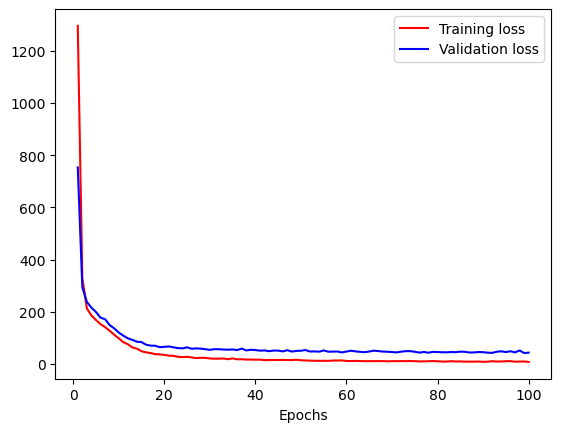

In [115]:
get_plot(data_fit['loss'],data['val_loss'],100)

### Improving the model

We can improve the model adding some features such as dropouts and regulizers.
 * Dropout layers, randomly sets a fraction of input units to 0 during training, which helps in regularizing the model and preventing overfitting.
 * This regularization term helps to control the complexity of the model and reduce overfitting.

In [145]:
def get_improved_model():
    model = Sequential([
                Dense(100, activation='relu', input_shape=(inputs,)),
                Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
                Dropout(0.2),
                Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
                Dropout(0.2),
                Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
                Dropout(0.2),
                Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
                Dropout(0.2),
                Dense(1)
    ])
    #Compile the model
    model.compile(optimizer = 'Adam',
                 loss = 'mean_squared_error',
                 )
    return model

In [146]:
improved_model = get_improved_model()
improved_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 100)               900       
                                                                 
 dense_108 (Dense)           (None, 100)               10100     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_109 (Dense)           (None, 100)               10100     
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_110 (Dense)           (None, 100)               10100     
                                                                 
 dropout_21 (Dropout)        (None, 100)             

In [147]:
history = improved_model.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=100,verbose=2)

Epoch 1/100
26/26 - 1s - loss: 1350.3098 - val_loss: 745.5433 - 1s/epoch - 47ms/step
Epoch 2/100
26/26 - 0s - loss: 375.9824 - val_loss: 262.4067 - 98ms/epoch - 4ms/step
Epoch 3/100
26/26 - 0s - loss: 237.4118 - val_loss: 230.4904 - 97ms/epoch - 4ms/step
Epoch 4/100
26/26 - 0s - loss: 216.9352 - val_loss: 204.3237 - 96ms/epoch - 4ms/step
Epoch 5/100
26/26 - 0s - loss: 186.5593 - val_loss: 180.0862 - 98ms/epoch - 4ms/step
Epoch 6/100
26/26 - 0s - loss: 166.0400 - val_loss: 168.1490 - 99ms/epoch - 4ms/step
Epoch 7/100
26/26 - 0s - loss: 158.1170 - val_loss: 151.5162 - 97ms/epoch - 4ms/step
Epoch 8/100
26/26 - 0s - loss: 126.7238 - val_loss: 123.3092 - 95ms/epoch - 4ms/step
Epoch 9/100
26/26 - 0s - loss: 108.0013 - val_loss: 100.0639 - 95ms/epoch - 4ms/step
Epoch 10/100
26/26 - 0s - loss: 98.8637 - val_loss: 96.3851 - 97ms/epoch - 4ms/step
Epoch 11/100
26/26 - 0s - loss: 89.5082 - val_loss: 114.6768 - 94ms/epoch - 4ms/step
Epoch 12/100
26/26 - 0s - loss: 86.2004 - val_loss: 81.7452 - 108m

In [148]:
data = history.history

data_train_improved = pd.DataFrame(data)
data_train_improved.tail()

,loss,val_loss
95,32.713112,53.454998
96,30.806503,46.697613
97,36.559704,44.701744
98,35.564899,47.231785
99,35.096695,45.046459


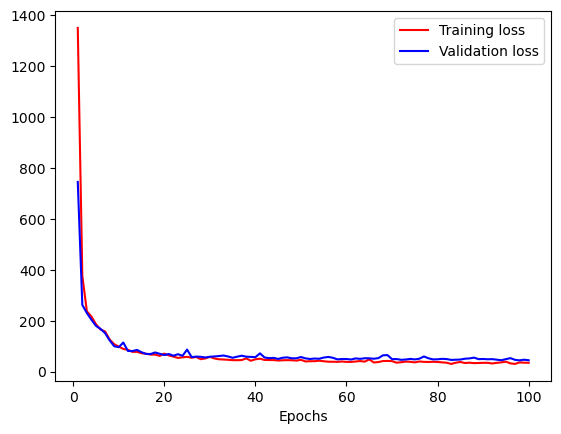

In [149]:
get_plot(data_train_improved['loss'],data_train_improved['val_loss'],100)

### Conclusions comparing both models

* In the first model the difference between the training loss and the validation loss is considerable, so we can say that the model is overfitting
* In the second model the difference decreased making the training and the validation loss values get closed. It suggests that the model's performance on the validation set is improving, indicating better generalization.